# Extracción de datos de Twitter por medio de API 

API (Application Programming Interfaces), en español, interfaz de programación de aplicaciones, definiciones y protocolos que se utiliza para desarrollar e integrar el software de las aplicaciones, permitiendo la comunicación entre dos aplicaciones de software a través de un conjunto de reglas. Éstas dependen de las aplicaciones que se van a utilizar, y de los permisos que les dé el propietario de la API a los desarrolladores de terceros.

## API de twitter
Específicamente, utilizaremos la API de Twitter para extraer y analizar tweets, y de esta manera obtener información sobre la incidencia de COVID-19 en Venezuela.

**Twarc** Bibilioteca de Python utilizada para acceder a la API de Twitter.

**Pasos a seguir para poder utilizar esta aplicación**
- Tener una cuenta en la red social de Twitter.
- Solicitar una cuenta de desarrollador; al ser aprobada, crear una aplicación para poder extraer los datos de Twitter.
- Extraer las credenciales de permiso (API KEY, API SECRET, ACCESS TOKEN, ACCESS TOKEN SECRET).


Importamos las bibliotecas con las que vamos a trabajar

In [2]:
import twarc 
import datetime
import itertools
from twarc.client2 import Twarc2
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


Hacemos la autenticación mediante el bearer token

In [44]:
t = Twarc2(bearer_token="AAAAAAAAAAAAAAAAAAAAABmzOgEAAAAAAdXaEdw8lrDMBtPj%2BwY318SBBmk%3DCvdZpj9aQg2ORVIfm0glUMXBNSm1yoDl1Zp1ifSRh3Lf6j6QEm")

La consulta la definimos entre el período comprendido entre el 13 de marzo de 2020 hasta el 8 de mayo de 2021. Para eso definimos las variables 'fecha de inicio', 'fecha final'. 

In [45]:
start_time = datetime.datetime(2020, 3, 13, 0, 0, 0, 0, datetime.timezone.utc)
end_time = datetime.datetime(2021, 5, 8, 0, 0, 0, 0, datetime.timezone.utc)

La consulta está determinada por las siguientes frases o palabras claves: 

**Palabras claves** 
- covid-19
- coronavirus
- infectado covid-19
- muerte covid-19
- bombona de oxígeno
- dexametasona
- GoFoundMe venezuela (con link)
- recolectar dinero
- flujómetro de oxígeno
- Tratamiento covid-19
- UCI covid-19

**Filtros**

- No retweets
- País: venezuela


**Colección de todos los datos** 


Leer los datos que se encuentran en un archivo .csv, con la columna 'created_at' como fecha; luego, pedir su forma.

In [23]:
data = pd.read_csv('data.csv', parse_dates=['created_at']) 
data.shape 

(1124, 2)

Convertir la columna a fecha.

In [17]:
data['created_at'] = pd.to_datetime(data['created_at'], format='%Y-%m-%d', errors='coerce')

Crear nuevas variables en el dataframe con el día, mes y año.

Crear un nuevo dataframe donde se agrupan las entradas con el mismo día, mes y año. El dataframe va a tener como índice la fecha en Y/M/D y como valor el número de tweets para ese día.

In [18]:
time_series_with_counts = data.groupby(data['created_at'].dt.floor('d')).size()

Remover las filas que sean iguales, es decir, los tweets que estén repetidos. 

In [19]:
data.drop_duplicates(keep='first')

,created_at,text
0,2021-04-28 23:17:21+00:00,Venezuela: el país donde el fiscal general qui...
1,2021-04-26 05:21:31+00:00,"@the_efosa Hi, I'm a desperate son loocking fo..."
2,2021-04-19 05:30:00+00:00,"#VENEZUELAENELMUNDO | Es una realidad que, la ..."
3,2021-04-19 02:08:17+00:00,"Aún falta mucho, todavía los familiares de Ani..."
4,2021-04-18 22:00:00+00:00,"#VENEZUELAENELMUNDO | Es una realidad que, la ..."
...,...,...
1119,2021-05-03 14:59:27+00:00,Con una inversión de 180mil millones de Bs\nSe...
1120,2021-05-03 14:13:10+00:00,El Gobernador @EdwinRojasM indicó que la unida...
1121,2021-05-03 12:11:49+00:00,Gobernador @EdwinRojasM Siempre pensando en su...
1122,2021-05-01 16:35:13+00:00,Hermana. El murió primero. En Valencia. Ella m...


In [20]:
#ax = time_series_with_counts['created_at'].plot()
#ax.set_title('Tweets')
#ax.set_ylabel('count')

<AxesSubplot:xlabel='created_at'>

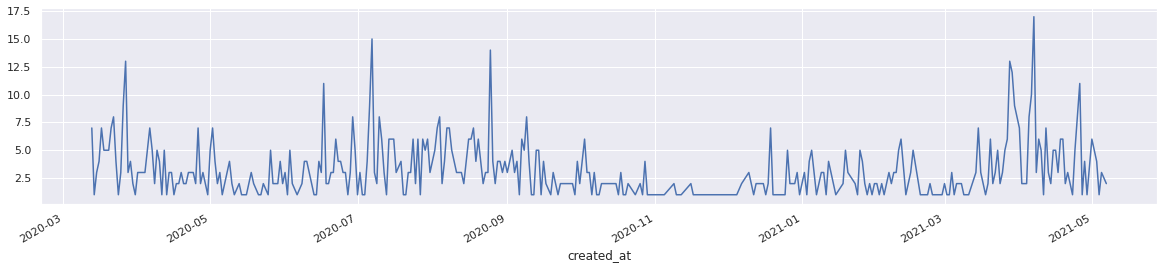

In [22]:
sns.set(rc={'figure.figsize':(20, 4)})
time_series_with_counts.plot()

**Búsqueda**

- covid-19
- coronavirus

In [40]:
search_results = t.search_all(query="covid-19 place_country:VE -is:retweet OR coronavirus place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

Obtener todas las páginas de resultados 

In [58]:
for page in search_results:
    with open("Datos.json", "w+") as f:
        f.write(json.dumps(page) + "\n")


In [507]:
datos_twitter = pd.read_csv('datos_twitter.csv', parse_dates=['created_at'])  
datos_twitter.shape 

(435, 2)

In [508]:
datos_twitter['created_at'] = pd.to_datetime(datos_twitter['created_at'], format='%Y-%m-%d', errors='coerce')


In [509]:
datos_twitter['day'] = datos_twitter['created_at'].dt.day
datos_twitter['year'] = datos_twitter['created_at'].dt.year
datos_twitter['month'] = datos_twitter['created_at'].dt.month  

In [510]:
datos_twitter.drop_duplicates(keep='first')

,created_at,text,day,year,month
0,2020-03-13 15:42:04+00:00,"#Coronavirus || Cambia la forma de saludar, no...",13.0,2020.0,3.0
1,2020-03-13 15:41:55+00:00,HABEMUS COVID_19,13.0,2020.0,3.0
2,2020-03-13 15:39:45+00:00,CUIDADO ESL CORONAVIRUS NO ES JUEGO en Los Teq...,13.0,2020.0,3.0
3,2020-03-13 15:39:39+00:00,Le pedimos a la @opsoms que atienda el caso de...,13.0,2020.0,3.0
4,2020-03-13 15:39:26+00:00,"A partir de éste momento, los que hace una sem...",13.0,2020.0,3.0
...,...,...,...,...,...
430,2020-03-13 00:08:39+00:00,Y con el #Covid_19 rodando. Peligroso el metro...,13.0,2020.0,3.0
431,2020-03-13 00:05:42+00:00,Es válido hacer concurso de quien usa mejor un...,13.0,2020.0,3.0
432,2020-03-13 00:04:57+00:00,Me acabo de comer unos mangos con adobo de el ...,13.0,2020.0,3.0
433,2020-03-13 00:04:19+00:00,@ansalomonico68 La pandemia del coronavirus pa...,13.0,2020.0,3.0


In [511]:
time_series_with_counts = datos_twitter[['created_at','day', 'month','year']].groupby(['day', 'month','year']).agg(['count'])

Text(0, 0.5, 'COVID_19/Coronavirus')

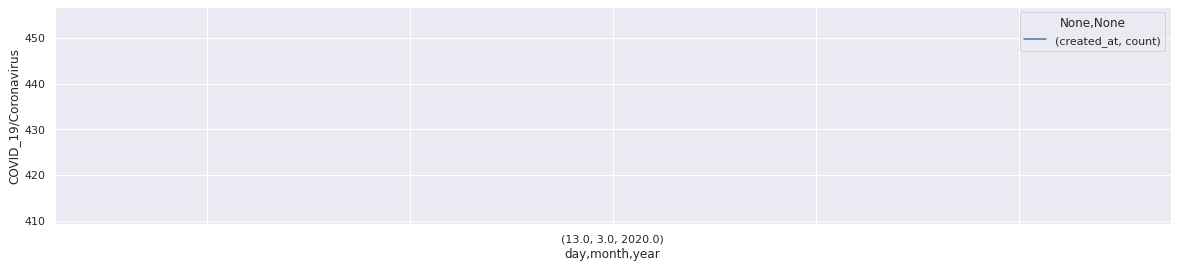

In [512]:
sns.set(rc={'figure.figsize':(20, 4)})
ax = time_series_with_counts.plot()
ax.set_ylabel('COVID_19/Coronavirus')

**Búsqueda1**

- infectado covid-19
- muerte covid-19

In [72]:
search_results = t.search_all(query="infectado covid-19 place_country:VE -is:retweet OR muerte covid-19 place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [73]:
for page in search_results:
    with open("Datos1.json", "w+") as f:
        f.write(json.dumps(page) + "\n")

In [513]:
datos_twitter1 = pd.read_csv('datos_twitter1.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
datos_twitter1.shape 

(304, 2)

In [514]:
datos_twitter1['created_at'] = pd.to_datetime(datos_twitter1['created_at'], format='%Y-%m-%d', errors='coerce')


In [515]:
datos_twitter1['day'] = datos_twitter1['created_at'].dt.day
datos_twitter1['year'] = datos_twitter1['created_at'].dt.year
datos_twitter1['month'] = datos_twitter1['created_at'].dt.month

In [516]:
datos_twitter1.drop_duplicates(keep='first')

,created_at,text,day,year,month
0,2021-04-28 11:18:54+00:00,Sumado al dolor por la muerte de Aristóbulo Is...,28,2021,4
1,2021-04-27 13:53:51+00:00,Muy triste por la muerte del profesor Andrés S...,27,2021,4
2,2021-04-24 17:18:23+00:00,@eloscarale *disminuye las probabilidades de c...,24,2021,4
3,2021-04-24 14:23:13+00:00,"Éste capítulo se llama ""Danzando alrededor de ...",24,2021,4
4,2021-04-20 00:15:53+00:00,"Lamento la muerte del Alcalde Bastidas, como ...",20,2021,4
...,...,...,...,...,...
298,2020-03-16 10:57:21+00:00,URGENTE!!!\n1er FALLECIDO POR COVID 19 EN ...,16,2020,3
299,2020-03-15 01:58:03+00:00,1er FALLECIDO X COVID 19 EN VENEZUELA\n1RA mue...,15,2020,3
300,2020-03-13 20:53:23+00:00,#LocalEC | Posible infectado con el covid-19 e...,13,2020,3
301,2020-03-13 03:18:52+00:00,por Dios si el gobierno negó la muerte de Cháv...,13,2020,3


In [517]:
time_series_with_counts = datos_twitter1[['created_at','day', 'month','year']].groupby(['day', 'month','year']).agg(['count'])

Text(0, 0.5, 'Conteo')

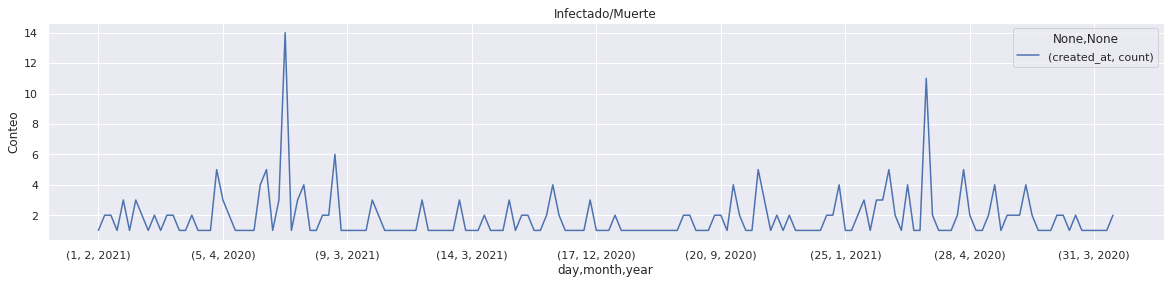

In [518]:
sns.set(rc={'figure.figsize':(20, 4)})
ax1 = time_series_with_counts.plot()
ax1.set_title('Infectado/Muerte')
ax1.set_ylabel('Conteo')

**Búsqueda2**

    - oxígeno
    - dexametasona

In [84]:
search_results = t.search_all(query="oxígeno place_country:VE -is:retweet OR dexametasona place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [85]:
for page in search_results:
    with open("Datos2.json", "w+") as f:
        f.write(json.dumps(page) + "\n")

**Búsqueda3**

- bombona de oxígeno
- dexametasona

In [86]:
search_results = t.search_all(query="bombona de oxígeno place_country:VE -is:retweet OR dexametasona place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [87]:
for page in search_results:
    with open("Datos3.json", "w+") as f:
        f.write(json.dumps(page) + "\n")

In [519]:
datos_twitter3 = pd.read_csv('datos_twitter3.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
datos_twitter3.shape 

(212, 3)

In [520]:
datos_twitter3['created_at'] = pd.to_datetime(datos_twitter3['created_at'], format='%Y-%m-%d', errors='coerce')

In [521]:
datos_twitter3['day'] = datos_twitter3['created_at'].dt.day
datos_twitter3['year'] = datos_twitter3['created_at'].dt.year
datos_twitter3['month'] = datos_twitter3['created_at'].dt.month

In [522]:
datos_twitter3.drop_duplicates(keep='first')

,created_at,text,Unnamed: 2,day,year,month
0,2021-04-28 17:26:59+00:00,🚑 El hijo de una amiga sufrió la picadura de u...,NaN,28,2021,4
1,2021-04-24 13:36:31+00:00,Buenos días quien tenga información exacta y n...,NaN,24,2021,4
2,2021-04-24 13:34:00+00:00,@VirguezFranklin Reflexione!! Quienes son los...,NaN,24,2021,4
3,2021-04-24 13:25:07+00:00,Reflexione!! Quienes son los reales genocidas...,NaN,24,2021,4
4,2021-04-22 14:07:09+00:00,Muchos pagan lo que no tienen por una bombona ...,NaN,22,2021,4
...,...,...,...,...,...,...
207,2020-03-26 02:33:50+00:00,@frasancti @Juliococo No existe bombona de oxí...,NaN,26,2020,3
208,2020-03-25 17:18:58+00:00,"@drodriven2 \n\nBuenas tardes camarada, como s...",NaN,25,2020,3
209,2020-03-17 20:46:32+00:00,@CarlosAranaSan @AnaGabyM07 Trump debe prohibi...,NaN,17,2020,3
210,2021-05-07 19:17:29+00:00,NaN,@FarmaciaAhinoa Buenas tardes. Por favor me pu...,7,2021,5


In [523]:
time_series_with_counts = datos_twitter3[['created_at','day', 'month','year']].groupby(['day', 'month','year']).agg(['count'])


Text(0, 0.5, 'Conteo')

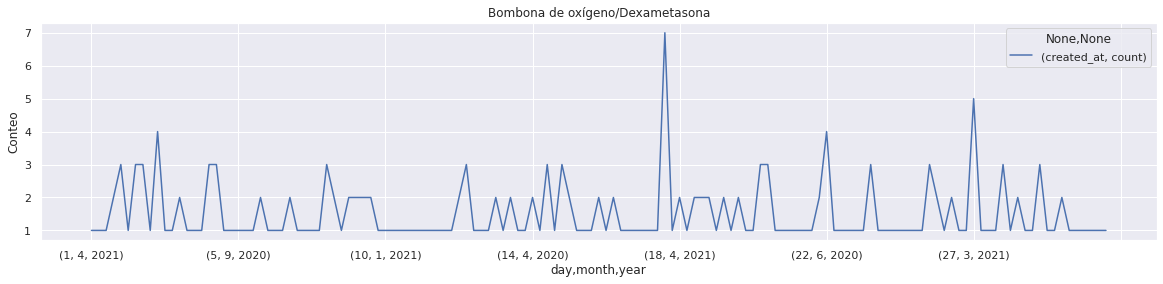

In [524]:
sns.set(rc={'figure.figsize':(20, 4)})
ax2 = time_series_with_counts.plot()
ax2.set_title('Bombona de oxígeno/Dexametasona')
ax2.set_ylabel('Conteo')


**Búsqueda4**

- campañas GoFoundMe tratamiento covid
- recolectar dinero covid

In [96]:
search_results = t.search_all(query="GoFoundMe venezuela covid -is:retweet OR recolectar dinero covid place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [97]:
for page in search_results:
    with open("Datos4.json", "w+") as f:
        f.write(json.dumps(page) + "\n")

In [525]:
datos_twitter4 = pd.read_csv('datos_twitter4.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
datos_twitter4.shape

(17, 2)

In [526]:
datos_twitter4['created_at'] = pd.to_datetime(datos_twitter4['created_at'], format='%Y-%m-%d', errors='coerce')


In [527]:
datos_twitter4['day'] = datos_twitter4['created_at'].dt.day
datos_twitter4['year'] = datos_twitter4['created_at'].dt.year
datos_twitter4['month'] = datos_twitter4['created_at'].dt.month

In [528]:
datos_twitter4.drop_duplicates(keep='first')

,created_at,text,day,year,month
0,2021-04-13 22:54:38+00:00,Qué horrible que en Venezuela todo está colaps...,13,2021,4
1,2021-04-12 19:53:10+00:00,Desde el #1Abr se han abierto 210 campañas de ...,12,2021,4
2,2021-04-09 14:42:17+00:00,Venezuela recurre a GoFoundMe para luchar cont...,9,2021,4
3,2021-04-06 07:08:20+00:00,My Twitter/Facebook feeds are full of GoFoundM...,6,2021,4
4,2021-04-05 17:46:05+00:00,@Simonovis Con Razón eso explicaría que 👉 El T...,5,2021,4
5,2021-04-05 06:03:35+00:00,No quiero ver mas gofoundme de personas con co...,5,2021,4
6,2021-03-31 16:18:05+00:00,Gracias a los que se pondrán de rodillas por V...,31,2021,3
7,2021-03-29 19:57:40+00:00,Lo cierto es que nadie debería verse en la nec...,29,2021,3
8,2021-03-29 15:12:22+00:00,"Es mi abuelito que está muy mal, si pueden ayu...",29,2021,3
9,2021-03-29 09:19:13+00:00,Ya no puedo ver más GoFoundMe y gente pidiendo...,29,2021,3


In [529]:
time_series_with_counts = datos_twitter4[['created_at','day', 'month','year']].groupby(['day', 'month','year']).agg(['count'])


Text(0, 0.5, 'Conteo')

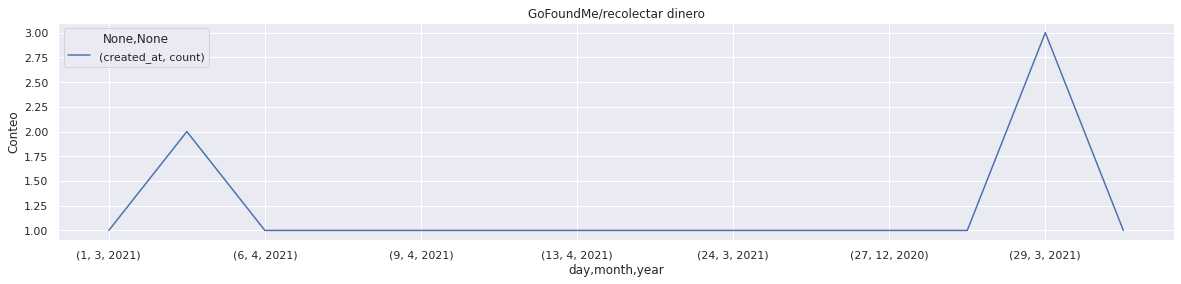

In [530]:
sns.set(rc={'figure.figsize':(20, 4)})
ax3 = time_series_with_counts.plot()
ax3.set_title('GoFoundMe/recolectar dinero')
ax3.set_ylabel('Conteo')


**Búsqueda5**

- GoFoundMe venezuela (con link)
- recolectar dinero 

In [105]:
search_results = t.search_all(query="GoFoundMe venezuela has:links -is:retweet OR recolectar dinero place_country:VE has:links -is:retweet", start_time=start_time, end_time=end_time)

In [106]:
for page in search_results:
    with open("Datos5.json", "w+") as f:
        f.write(json.dumps(page) + "\n")

In [531]:
datos_twitter5 = pd.read_csv('datos_twitter5.csv', parse_dates=['created_at']) 
datos_twitter5.shape 

(155, 2)

In [532]:
datos_twitter5['created_at'] = pd.to_datetime(datos_twitter5['created_at'], format='%Y-%m-%d', errors='coerce')

In [533]:
datos_twitter5['day'] = datos_twitter5['created_at'].dt.day
datos_twitter5['year'] = datos_twitter5['created_at'].dt.year
datos_twitter5['month'] = datos_twitter5['created_at'].dt.month

In [534]:
datos_twitter5.drop_duplicates(keep='first')

,created_at,text,day,year,month
0,2021-04-28 23:17:21+00:00,Venezuela: el país donde el fiscal general qui...,28,2021,4
1,2021-04-26 05:21:31+00:00,"@the_efosa Hi, I'm a desperate son loocking fo...",26,2021,4
2,2021-04-19 05:30:00+00:00,"#VENEZUELAENELMUNDO | Es una realidad que, la ...",19,2021,4
3,2021-04-19 02:08:17+00:00,"Aún falta mucho, todavía los familiares de Ani...",19,2021,4
4,2021-04-18 22:00:00+00:00,"#VENEZUELAENELMUNDO | Es una realidad que, la ...",18,2021,4
...,...,...,...,...,...
150,2020-05-01 20:47:52+00:00,El Link de la campaña es el siguiente:\nhttps:...,1,2020,5
151,2020-04-24 06:50:11+00:00,https://t.co/M64ndX2JRi\n\nHi @JeffreeStar . I...,24,2020,4
152,2020-04-13 05:17:48+00:00,@LuisCarlos buenas noches. Recurro a ti para p...,13,2020,4
153,2020-04-01 13:18:09+00:00,"Hola amigos, paso por aquí para solicitar de t...",1,2020,4


In [535]:
time_series_with_counts = datos_twitter5[['created_at','day', 'month','year']].groupby(['day', 'month','year']).agg(['count'])


Text(0, 0.5, 'Conteo')

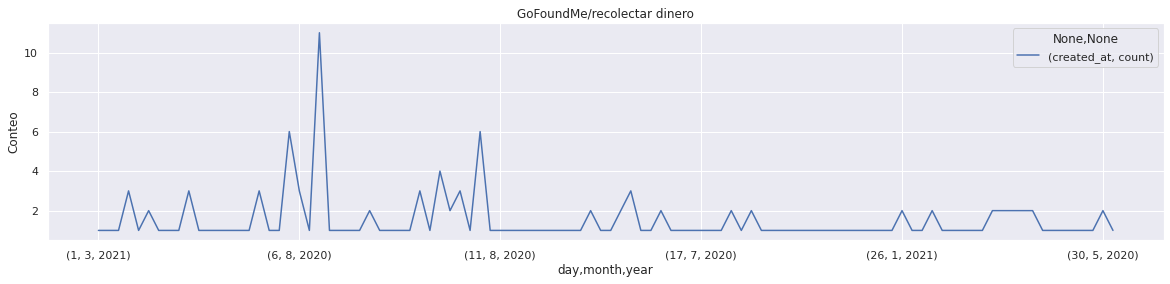

In [538]:
sns.set(rc={'figure.figsize':(20, 4)})
ax5 = time_series_with_counts.plot()
ax5.set_title('GoFoundMe/recolectar dinero')
ax5.set_ylabel('Conteo')

**Búsqueda6**

- flujómetro de oxígeno

In [115]:
search_results = t.search_all(query="flujómetro de oxígeno place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [116]:
for page in search_results:
    with open("Datos6.json", "w+") as f:
        f.write(json.dumps(page) + "\n")

In [4]:
datos_twitter6 = pd.read_csv('datos_twitter6.csv', parse_dates=['created_at'])  
datos_twitter6.shape 

(4, 2)

In [5]:
datos_twitter6['created_at'] = pd.to_datetime(datos_twitter6['created_at'], format='%Y-%m-%d', errors='coerce')

In [6]:
datos_twitter6['day'] = datos_twitter6['created_at'].dt.day
datos_twitter6['year'] = datos_twitter6['created_at'].dt.year
datos_twitter6['month'] = datos_twitter6['created_at'].dt.month

In [7]:
datos_twitter6.drop_duplicates(keep='first')

,created_at,text,day,year,month
0,2021-04-08 19:59:32+00:00,Disponibles para ENTREGA INMEDIATA Regulador d...,8,2021,4
1,2021-03-28 00:19:27+00:00,Regulador de Oxigeno Medicinal de 0-15 Lpm con...,28,2021,3
2,2021-03-27 23:42:49+00:00,@Ivanab__ Disponible regulador de oxigeno con ...,27,2021,3
3,2021-03-06 23:13:10+00:00,URGENTE: la señora Rosa Henríquez está en el h...,6,2021,3


In [9]:
#time_series_with_counts = datos_twitter6[['created_at','day', 'month','year']].groupby(['day', 'month','year']).agg(['count'])

In [10]:
#sns.set(rc={'figure.figsize':(20, 4)})
#ax6 = time_series_with_counts.plot()
#ax6.set_title('GoFoundMe/Recolectar dinero')
#ax6.set_ylabel('Conteo')

**Búsqueda7**

- servicio público (hashtag)

In [147]:
search_results = t.search_all(query="#ServicioPúblico covid-19 place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [149]:
for page in search_results:
    with open("Datos7.json", "w+") as f:
        f.write(json.dumps(page) + "\n")

In [545]:
datos_twitter7 = pd.read_csv('datos_twitter7.csv', parse_dates=['created_at']) 
datos_twitter7.shape 

(42, 2)

In [546]:
datos_twitter7['created_at'] = pd.to_datetime(datos_twitter7['created_at'], format='%Y-%m-%d', errors='coerce')

In [547]:
datos_twitter7['day'] = datos_twitter7['created_at'].dt.day
datos_twitter7['year'] = datos_twitter7['created_at'].dt.year
datos_twitter7['month'] = datos_twitter7['created_at'].dt.month

In [548]:
datos_twitter7.drop_duplicates(keep='first')

,created_at,text,day,year,month
0,2021-04-21 14:32:36+00:00,#ServicioPublico Les pido su colaboración para...,21,2021,4
1,2021-04-12 16:14:09+00:00,#ServicioPublico\n\nAyuda al Mtro. Rugeles par...,12,2021,4
2,2021-04-10 16:36:13+00:00,#10Abril. #ServicioPúblico \n\n#URGENTE Juan M...,10,2021,4
3,2021-04-07 14:51:06+00:00,#ServicioPublico #Caracas Busco Remdisivir en ...,7,2021,4
4,2021-04-06 00:01:51+00:00,#ServicioPublico | Para paciente con fibrosis ...,6,2021,4
5,2021-04-01 11:43:51+00:00,#ServicioPublico #MarbelisMiranda\n\nHoy neces...,1,2021,4
6,2021-03-31 19:27:45+00:00,#ServicioPublico | Se requiere con carácter de...,31,2021,3
7,2021-03-31 19:15:42+00:00,#ServicioPublico Se solicita concentrador de o...,31,2021,3
8,2021-03-30 19:42:31+00:00,@fundasperven #ServicioPublico \nYajaira neces...,30,2021,3
9,2021-03-20 23:23:28+00:00,#ServicioPúblico Para paciente con COVID-19 en...,20,2021,3


In [549]:
time_series_with_counts = datos_twitter7[['created_at','day', 'month','year']].groupby(['day', 'month','year']).agg(['count'])

Text(0, 0.5, 'Conteo')

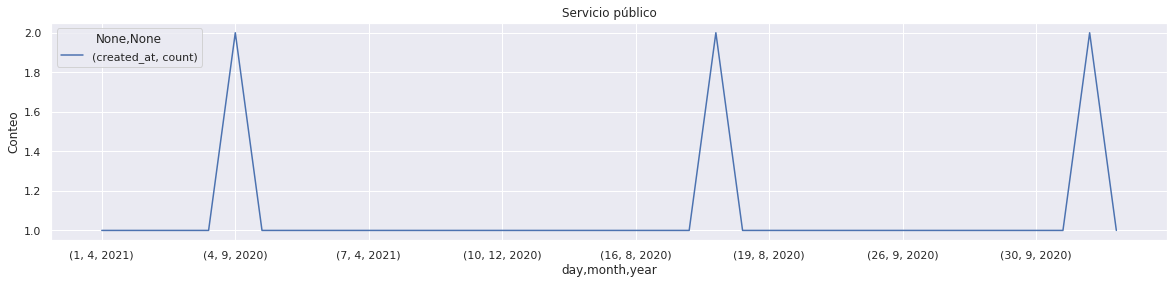

In [550]:
sns.set(rc={'figure.figsize':(20, 4)})
ax7 = time_series_with_counts.plot()
ax7.set_title('Servicio público')
ax7.set_ylabel('Conteo')

**Búsqueda8**

- UCIS 
- unidad de cuidados intensivos

In [162]:
search_results = t.search_all(query="UCIS place_country:VE -is:retweet OR unidad de cuidados intensivos place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [164]:
for page in search_results:
    with open("Datos8.json", "w+") as f:
        f.write(json.dumps(page) + "\n")

In [551]:
datos_twitter8 = pd.read_csv('datos_twitter8.csv', parse_dates=['created_at'])  
datos_twitter8.shape 

(76, 2)

In [552]:
datos_twitter8['day'] = datos_twitter8['created_at'].dt.day
datos_twitter8['year'] = datos_twitter8['created_at'].dt.year
datos_twitter8['month'] = datos_twitter8['created_at'].dt.month

In [553]:
datos_twitter8.drop_duplicates(keep='first')

,created_at,text,day,year,month
0,2021-04-26 12:52:42+00:00,UCI DE PRIMER MUNDO✅👏🏻\n\n@EdwinRojasM: En la ...,26,2021,4
1,2021-04-26 12:51:07+00:00,En Vivo 📻 programa La Voz De Sucre 📺\n@EdwinRo...,26,2021,4
2,2021-04-23 13:31:15+00:00,Cumpliendo con las orientaciones precisas del ...,23,2021,4
3,2021-04-19 13:40:36+00:00,#SALUD | Próximamente se estará inaugurando la...,19,2021,4
4,2021-04-19 13:30:46+00:00,El líder sucrense @EdwinRojasM anunció que pr...,19,2021,4
...,...,...,...,...,...
71,2021-05-03 14:59:27+00:00,Con una inversión de 180mil millones de Bs\nSe...,3,2021,5
72,2021-05-03 14:13:10+00:00,El Gobernador @EdwinRojasM indicó que la unida...,3,2021,5
73,2021-05-03 12:11:49+00:00,Gobernador @EdwinRojasM Siempre pensando en su...,3,2021,5
74,2021-05-01 16:35:13+00:00,Hermana. El murió primero. En Valencia. Ella m...,1,2021,5


In [554]:
time_series_with_counts = datos_twitter8[['created_at','day', 'month','year']].groupby(['day', 'month','year']).agg(['count'])

Text(0, 0.5, 'Conteo')

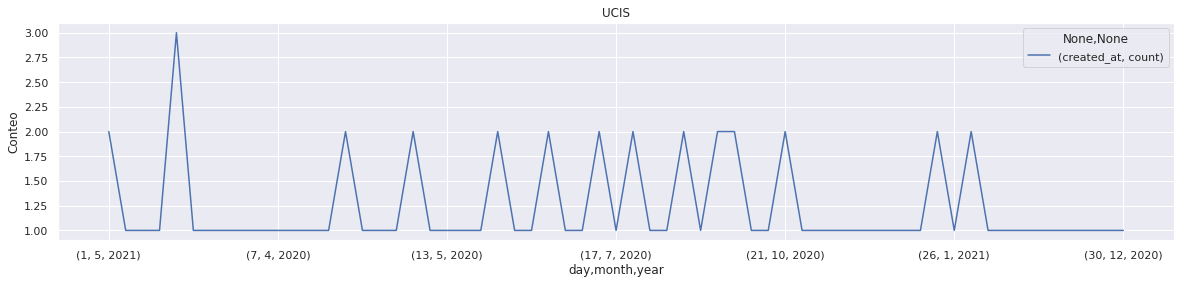

In [555]:
sns.set(rc={'figure.figsize':(20, 4)})

ax8 = time_series_with_counts.plot()
ax8.set_title('UCIS')
ax8.set_ylabel('Conteo')

**Búsqueda9**

- tratamiento covid-19

In [268]:
search_results = t.search_all(query="tratamiento covid-19 place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [269]:
for page in search_results:
    with open("Datos9.json", "w+") as f:
        f.write(json.dumps(page) + "\n")

In [563]:
datos_twitter9 = pd.read_csv('datos_twitter9.csv', parse_dates=['created_at']) 
datos_twitter9.shape

(324, 2)

In [564]:
datos_twitter9['day'] = datos_twitter9['created_at'].dt.day
datos_twitter9['year'] = datos_twitter9['created_at'].dt.year
datos_twitter9['month'] = datos_twitter9['created_at'].dt.month

In [565]:
datos_twitter9.drop_duplicates(keep='first')

,created_at,text,day,year,month
0,2021-04-29 13:12:42+00:00,Atender a los pacientes con Covid-19 es una tr...,29,2021,4
1,2021-04-28 21:17:54+00:00,#28Abr El padre Beltrán Sánchez superó el #Cov...,28,2021,4
2,2021-04-26 21:55:49+00:00,#26Abr Al final de la noche del domingo #25Abr...,26,2021,4
3,2021-04-26 13:50:57+00:00,Se entegaron 6 nuevos equipos de ventilación m...,26,2021,4
4,2021-04-26 10:08:44+00:00,TRATAMIENTO PARA COVID-19 YA VACUNAS YA,26,2021,4
...,...,...,...,...,...
319,2020-03-15 20:00:44+00:00,No se deben usar antibióticos como medio de pr...,15,2020,3
320,2020-03-14 03:26:41+00:00,#coronapocalypse #coronavirusvenezuela #Covid_...,14,2020,3
321,2020-03-13 19:36:45+00:00,"La Cuba ""Castro-Comunista"" a la vanguardia mu...",13,2020,3
322,2020-03-13 02:37:57+00:00,@joselui02124198 Así como han ocultado estadís...,13,2020,3


In [559]:
time_series_with_counts = datos_twitter9[['created_at','day', 'month','year']].groupby(['day', 'month','year']).agg(['count'])

Text(0, 0.5, 'Conteo')

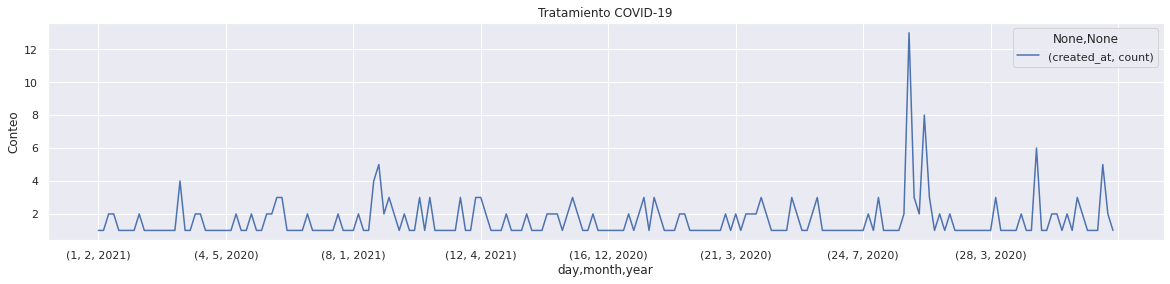

In [560]:
sns.set(rc={'figure.figsize':(20, 4)})
ax9 = time_series_with_counts.plot()
ax9.set_title('Tratamiento COVID-19')
ax9.set_ylabel('Conteo')